### 1. объединить в одну выборку (это только для твитов)

In [14]:
import pandas as pd
import numpy as np

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
df = pd.read_pickle('tweets.pkl') # Предобработка из первого ДЗ

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
df.head()

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...",father dysfunctional selfish drags kids dysfun...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...",thanks lyft credit use cause offer wheelchair ...,thanks lyft credit use cause offer wheelchair ...
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty
3,4,0.0,model love yoyou take with yoyou all the time ...,"[model, love, yoyou, take, with, yoyou, all, t...","[model, love, yoyou, take, yoyou, time, yoyour]",model love yoyou take yoyou time yoyour,model love yoyou take yoyou time yoyour
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguide society motiv,factsguide society motivation


###  2. провести исследование и выявить тематики о которых говорят в твитах (для твитов)

In [17]:
from gensim.models import *
from gensim import corpora

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [18]:
dictionary = corpora.Dictionary(df['tweet_token'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('tweets.dict')

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
corpus = [dictionary.doc2bow(text) for text in df['tweet_token']]
corpora.MmCorpus.serialize('tweets.model', corpus) 

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, chunksize=50, update_every=1, passes=2)

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 25.6 s, sys: 168 ms, total: 25.8 s
Wall time: 26 s


In [21]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(5,
  '0.496*"the" + 0.270*"of" + 0.062*"on" + 0.044*"one" + 0.041*"more" + 0.029*"great" + 0.026*"only" + 0.012*"once" + 0.009*"word" + 0.002*"service"'),
 (1,
  '0.580*"for" + 0.330*"am" + 0.058*"positive" + 0.012*"sunshine" + 0.000*"at" + 0.000*"me" + 0.000*"ready" + 0.000*"healthy" + 0.000*"new" + 0.000*"what"'),
 (18,
  '0.274*"not" + 0.209*"that" + 0.138*"can" + 0.084*"you" + 0.067*"if" + 0.045*"think" + 0.039*"year" + 0.032*"hate" + 0.032*"girl" + 0.029*"next"'),
 (10,
  '0.391*"thankful" + 0.299*"positive" + 0.168*"tomorrow" + 0.077*"having" + 0.000*"learn" + 0.000*"instagood" + 0.000*"how" + 0.000*"instagram" + 0.000*"freedom" + 0.000*"new"'),
 (12,
  '0.308*"from" + 0.245*"no" + 0.117*"blog" + 0.085*"silver" + 0.077*"gold" + 0.067*"forex" + 0.044*"may" + 0.012*"australia" + 0.002*"price" + 0.000*"eur"'),
 (6,
  '0.145*"with" + 0.115*"the" + 0.081*"in" + 0.072*"just" + 0.069*"time" + 0.057*"as" + 0.053*"yoyou" + 0.050*"bihday" + 0.046*"got" + 0.046*"an"'),
 (2,
  '0.338*"in" 

### 3. сделать визуализацию кластеров тематик

In [22]:
#!pip install pyLDAvis --upgrade

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
#!pip install --upgrade pandas==1.2.3

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis

# pyLDAvis.enable_notebook()

# vis = gensimvis.prepare(lda, corpus, dictionary)
# vis

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [42]:
print('Перплексия: ', np.exp(lda.log_perplexity(corpus)))
coherence_model_lda = CoherenceModel(model=lda, texts=df['tweet_token'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Перплексия:  1.646719669117689e-08
Средняя когерентность:  0.34488988128056014


In [45]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


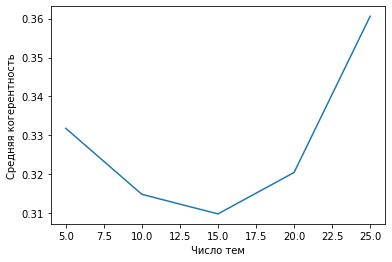

In [46]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=df['tweet_token'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


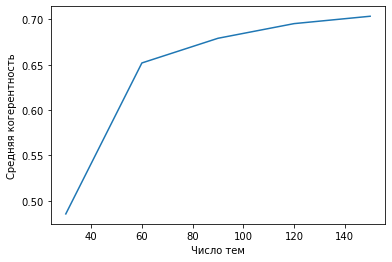

In [51]:
topics_list = np.arange(30, 180, 30)
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=df['tweet_token'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [57]:
lda_60 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=60, chunksize=50, update_every=1, passes=2)

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4.  Проинтерпретировать получившиеся тематики

In [59]:
lda_60.show_topics(num_topics=10, num_words=30, formatted=False)

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(59,
  [('parliament', 0.00021399531),
   ('active', 0.00021399531),
   ('mix', 0.00021399531),
   ('moon', 0.00021399531),
   ('conservative', 0.00021399531),
   ('unfair', 0.00021399531),
   ('playlist', 0.00021399531),
   ('spotify', 0.00021399531),
   ('ibiza', 0.00021399531),
   ('divorce', 0.00021399531),
   ('tb', 0.00021399531),
   ('wake', 0.00021399531),
   ('arkansas', 0.00021399531),
   ('area', 0.00021399531),
   ('impact', 0.00021399531),
   ('showcase', 0.00021399531),
   ('spain', 0.00021399531),
   ('circle', 0.00021399531),
   ('laughing', 0.00021399531),
   ('roof', 0.00021399531),
   ('hole', 0.00021399531),
   ('deal', 0.00021399531),
   ('spoke', 0.00021399531),
   ('determined', 0.00021399531),
   ('strikes', 0.00021399531),
   ('visiting', 0.00021399531),
   ('wonder', 0.00021399531),
   ('angels', 0.00021399531),
   ('reply', 0.00021399531),
   ('window', 0.00021399531)]),
 (1,
  [('happy', 0.42447546),
   ('day', 0.40572324),
   ('man', 0.050179794),
   ('aft

Из графиков выше видно, что в датасете примерно 60 наиболее выраженных тем.
В show_topic заметны 2 темы: обсуждение праздников и чем люди занимаются по пятницам.